In [1]:
import glob
import os
import math
import numpy as np
import matplotlib.pyplot as plt

# Periodic graph uniform sign

## P=16

In [2]:
import math
dataset_root = '/tmp'
type_graph = "periodic_graph_uniform_sign_"

# Different runs
strings = [
    type_graph + 'N_500_P_16_rho_0.5',
    type_graph + 'N_1000_P_16_rho_0.5',
    type_graph + 'N_1500_P_16_rho_0.5',
    type_graph + 'N_2000_P_16_rho_0.5',
    type_graph + 'N_2500_P_16_rho_0.5',
    type_graph + 'N_3000_P_16_rho_0.5',
    type_graph + 'N_3500_P_16_rho_0.5',
    type_graph + 'N_4000_P_16_rho_0.5',
]
Ks = [7, 6, 5, 4, 3, 2, 1]
P = float(16)

all_L2_norm_L1_LR_scikit = [[] for _ in range(len(strings))]
all_n_vertex_L1_LR_scikit = [[] for _ in range(len(strings))]
all_recovered_L1_LR_scikit = [[] for _ in range(len(strings))]

all_L2_norm_L1_constrained_LR = [[] for _ in range(len(strings))]
all_n_vertex_L1_constrained_LR = [[] for _ in range(len(strings))]
all_recovered_L1_constrained_LR = [[] for _ in range(len(strings))]

all_L2_norm_L0L2_LR = [[] for _ in range(len(strings))]
all_n_vertex_L0L2_LR = [[] for _ in range(len(strings))]
all_recovered_L0L2_LR = [[] for _ in range(len(strings))]

all_L2_norm_L1_ISE = [[] for _ in range(len(strings))]
all_n_vertex_L1_ISE = [[] for _ in range(len(strings))]
all_recovered_L1_ISE = [[] for _ in range(len(strings))]

all_L2_norm_L0L2_ISE = [[] for _ in range(len(strings))]
all_n_vertex_L0L2_ISE = [[] for _ in range(len(strings))]
all_recovered_L0L2_ISE = [[] for _ in range(len(strings))]


for idx, string in enumerate(strings):
    for res_path in glob.glob(os.path.join(dataset_root, string, '*.npz')):
        res = np.load(res_path)
        Ks_ = res["Ks"]
        W_gt = res["W_gt"]
        assert np.all(Ks == Ks_)
        
        # L1-LR, validation
        W_L1_PL_val = res["W_L1_LR_val"]
        all_L2_norm_L1_LR_scikit[idx].append(np.linalg.norm(W_gt - W_L1_PL_val))
        all_n_vertex_L1_LR_scikit[idx].append(res["n_vertex_L1_LR_scikit_val"] / P)
        all_recovered_L1_LR_scikit[idx].append(res["recovered_L1_LR_scikit_val"])
        
        # L1-constrained LR
        W_L1_constrained_LR = res["W_L1_constrained_LR"]
        all_L2_norm_L1_constrained_LR[idx].append(np.linalg.norm(W_gt - W_L1_constrained_LR))
        all_n_vertex_L1_constrained_LR[idx].append(res["n_vertex_L1_constrained_LR"] / P)
        all_recovered_L1_constrained_LR[idx].append(res["recovered_L1_constrained_LR"])
        
        # L0-L2 LR
        bics_L0L2_LR = res["bics_L0L2_LR"]
        argmin1 = bics_L0L2_LR.argmin()
        Ws_L0L2_LR = res["Ws_L0L2_LR"]
        n_vertices_L0L2_LR = res["n_vertices_L0L2_LR"]
        recovered_L0L2_LR = res["recovered_L0L2_LR"]
        all_L2_norm_L0L2_LR[idx].append(np.linalg.norm(W_gt - Ws_L0L2_LR[argmin1]))
        all_n_vertex_L0L2_LR[idx].append(n_vertices_L0L2_LR[argmin1] / P)
        all_recovered_L0L2_LR[idx].append(recovered_L0L2_LR[argmin1])

        # L1-ISE, validation
        W_L1_ISE_val = res["W_L1_ISE_val"]
        all_L2_norm_L1_ISE[idx].append(np.linalg.norm(W_gt - W_L1_ISE_val))
        all_n_vertex_L1_ISE[idx].append(res["n_vertex_L1_ISE_val"] / P)
        all_recovered_L1_ISE[idx].append(res["recovered_L1_ISE_val"])
    
        # L0-L2 ISE
        bics_L0L2_ISE = res["bics_L0L2_ISE"]
        argmin2 = bics_L0L2_ISE.argmin()
        Ws_L0L2_ISE = res["Ws_L0L2_ISE"]
        n_vertices_L0L2_ISE = res["n_vertices_L0L2_ISE"]
        recovered_L0L2_ISE = res["recovered_L0L2_ISE"]
        all_L2_norm_L0L2_ISE[idx].append(np.linalg.norm(W_gt - Ws_L0L2_ISE[argmin2]))
        all_n_vertex_L0L2_ISE[idx].append(n_vertices_L0L2_ISE[argmin2] / P)
        all_recovered_L0L2_ISE[idx].append(recovered_L0L2_ISE[argmin2])
    

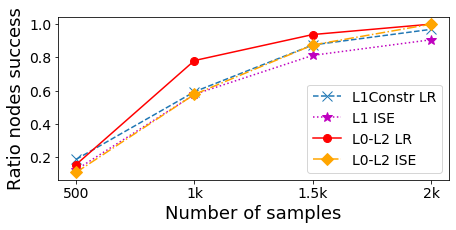

In [4]:
Ns = ['500', '1k', '1.5k', '2k', '2.5k', '3k', '3.5k', '4k']

fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(1,1,1)
# plt.plot(
#     Ns, np.mean(all_n_vertex_L1_LR_scikit, axis=1), label='L1 LR', c='g', marker='^', linestyle='-.', markersize=10
# )
plt.plot(
    Ns, np.mean(all_n_vertex_L1_constrained_LR, axis=1), label='L1Constr LR', marker='x', linestyle='--', markersize=10
)
plt.plot(
    Ns, np.mean(all_n_vertex_L1_ISE, axis=1), label='L1 ISE', c='m', marker='*', linestyle=':', markersize=10
)
plt.plot(
    Ns, np.mean(all_n_vertex_L0L2_LR, axis=1), label='L0-L2 LR', c='r', marker='o', linestyle='-', markersize=8
)
plt.plot(
    Ns, np.mean(all_n_vertex_L0L2_ISE, axis=1), label='L0-L2 ISE', c='#FFA500', marker='D', linestyle='-.', markersize=8
)

plt.xlabel('Number of samples', fontsize=18)
plt.ylabel('Ratio nodes success', fontsize=18)
plt.legend(fontsize=14)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)  

periodic_graph_uniform_sign_P_16_rho_05.pdf


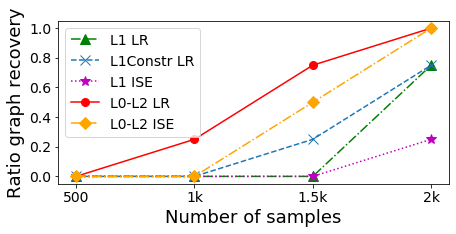

In [5]:
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(1,1,1)
plt.plot(
    Ns, np.mean(all_recovered_L1_LR_scikit, axis=1), label='L1 LR', c='g', marker='^', linestyle='-.', markersize=10
)
plt.plot(
    Ns, np.mean(all_recovered_L1_constrained_LR, axis=1), label='L1Constr LR', marker='x', linestyle='--', markersize=10
)
plt.plot(
    Ns, np.mean(all_recovered_L1_ISE, axis=1), label='L1 ISE', c='m', marker='*', linestyle=':', markersize=10
)
plt.plot(
    Ns, np.mean(all_recovered_L0L2_LR, axis=1), label='L0-L2 LR', c='r', marker='o', linestyle='-', markersize=8
)
plt.plot(
    Ns, np.mean(all_recovered_L0L2_ISE, axis=1), label='L0-L2 ISE', c='#FFA500', marker='D', linestyle='-.', markersize=8
)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

plt.xlabel('Number of samples', fontsize=18)
plt.ylabel('Ratio graph recovery', fontsize=18)
lgd = plt.legend(fontsize=14)

plt.savefig('/tmp/' + type_graph + 'P_16_rho_05.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
print(type_graph + 'P_16_rho_05.pdf')

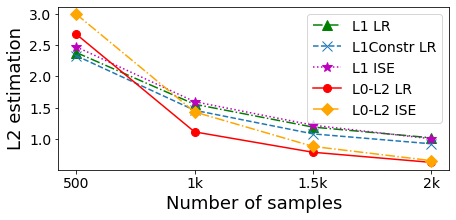

In [6]:
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(1,1,1)
plt.plot(
    Ns, np.mean(all_L2_norm_L1_LR_scikit, axis=1), label='L1 LR', c='g', marker='^', linestyle='-.', markersize=10
)
plt.plot(
    Ns, np.mean(all_L2_norm_L1_constrained_LR, axis=1), label='L1Constr LR', marker='x', linestyle='--', markersize=10
)
plt.plot(
    Ns, np.mean(all_L2_norm_L1_ISE, axis=1), label='L1 ISE', c='m', marker='*', linestyle=':', markersize=10
)
plt.plot(
    Ns, np.mean(all_L2_norm_L0L2_LR, axis=1), label='L0-L2 LR', c='r', marker='o', linestyle='-', markersize=8
)
plt.plot(
    Ns, np.mean(all_L2_norm_L0L2_ISE, axis=1), label='L0-L2 ISE', c='#FFA500', marker='D', linestyle='-.', markersize=8
)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

plt.xlabel('Number of samples', fontsize=18)
plt.ylabel('L2 estimation', fontsize=18)
lgd = plt.legend(fontsize=14)

plt.savefig('/tmp/' + type_graph + 'P_16_rho_05_L2norm.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')